<p><img alt="UNQ logo" height="45px" width="115px" src="https://sobrelibrosycultura.com/wp-content/uploads/2016/09/quilmes-1.jpg
" align="left" hspace="10px" vspace="0px"></p><h1>Redes Neuronales y Lógica Difusa</h1>

**NOTA 1:** Este ejercicio debe hacerse utilizando un entorno de ejecución local, debido a que necesita un tipo de interacción que no puede tenerse en Google Colab. Para ejecutarlo localmente debe seguir [estos pasos](https://research.google.com/colaboratory/local-runtimes.html).

Si ya había instalado todo solamente hay que correr el siguiente comando en la consola de la PC y luego conectarse a un entorno local en Google Colab y copiar la URL que me entregó la consola.

jupyter notebook --NotebookApp.allow_origin='https://colab.research.google.com' --port=8888 --NotebookApp.port_retries=0

**NOTA 2:**
Como el entorno de ejecución es local (su PC), hay que tener instalado Git para poder acceder al repositorio de la materia. Para instalarlo deben seguir [estos pasos](https://git-scm.com/book/en/v2/Getting-Started-Installin).

In [ ]:
!git clone https://github.com/redes-unq/Imagenes.git

In [ ]:
!pip install scikit-learn

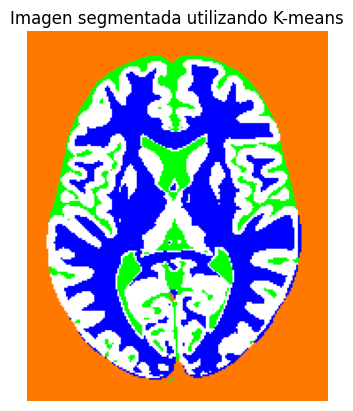

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.cluster import KMeans

%matplotlib inline

# Cargar las imágenes en escala de grises
im = []
im.append(Image.open("Imagenes/mi1.png").convert('L'))
im.append(Image.open("Imagenes/mi2.png").convert('L'))
im.append(Image.open("Imagenes/mi3.png").convert('L'))

# Obtener las dimensiones de la imagen
width, height = im[0].size

# Inicializar la matriz de características
X = []

# Extraer las características de cada píxel de las tres imágenes
for y in range(height):
    for x in range(width):
        color_mb = im[0].getpixel((x, y))
        color_mg = im[1].getpixel((x, y))
        color_cf = im[2].getpixel((x, y))
        X.append([color_mb, color_mg, color_cf])

# Convertir X a una matriz numpy
X = np.array(X)

# Aplicar K-means
n_clusters = 4  # Número de clases
kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init="auto").fit(X)
labels = kmeans.labels_

# Crear una imagen para mostrar la segmentación
segmented_image = np.zeros((height, width, 3), dtype=np.uint8)

# Asignar colores a cada píxel basado en la clase
colors = [
    [255, 120, 0],  # Naranja para la clase 0
    [255, 255, 255],  # Blanco para la clase 1
    [0, 255, 0],  # Verde para la clase 2
    [0, 0, 255]  # Azul para la clase 3
]

# Asignar colores a cada píxel según su etiqueta
index = 0
for y in range(height):
    for x in range(width):
        segmented_image[y, x] = colors[labels[index]]
        index += 1

# Mostrar la imagen segmentada
plt.imshow(segmented_image)
plt.axis('off')
plt.title("Imagen segmentada utilizando K-means")
plt.show()